#PhlyGreen Tutorial 

Import packages

In [1]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
import PhlyGreen.Utilities.Units as Units

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [3]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery, climateimpact)

Create the connections with its subsystems.

In [4]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft
climateimpact.aircraft = myaircraft

Define input dictionaries

In [5]:
ConstraintsInput = {'DISA': 0.,
                    'Cruise': {'Speed': 0.5, 'Speed Type':'Mach', 'Beta': 0.95, 'Altitude': 8000.},
                    'AEO Climb': {'Speed': 210, 'Speed Type':'KCAS', 'Beta': 0.97, 'Altitude': 6000., 'ROC': 5},
                    'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'Climb Gradient': 0.021},
                    'Take Off': {'Speed': 90, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 100., 'kTO': 1.2, 'sTO': 950},
                    'Landing':{'Speed': 59., 'Speed Type': 'TAS', 'Altitude': 500.},
                    'Turn':{'Speed': 210, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 5000, 'Load Factor': 1.1},
                    'Ceiling':{'Speed': 0.5, 'Beta': 0.8, 'Altitude': 9500, 'HT': 0.5},
                    'Acceleration':{'Mach 1': 0.3, 'Mach 2':0.4, 'DT': 180, 'Altitude': 6000, 'Beta': 0.9}}

In [6]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.97,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [7]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.}},
                'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.16, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0}},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 120, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.07, 'Speed': 125, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.4, 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.3, 'phi_end':0.3}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}


In [8]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Contingency Fuel': 130,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.22,
                   'Eta Propulsive Model': 'Hamilton',
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive': 0.9,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3900,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

In [9]:
CellInput = {
    'Class': "I",
    'Model':'Finger-Cell-Thermal',
    'SpecificPower': 8000,
    'SpecificEnergy': 1500,
    'Minimum SOC': 0.2,
    'Ebat': 1000 * 3600, # PhlyGreen uses this input only if Class == 'I'
    'pbat': 1000
    }

In [10]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 11, 'e_osw': 0.8}},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}


PropellerInput = {'Propeller Diameter': Units.ftTom(13),
                  'RPM': 13820/13, # JUST AN ESTIMATION FOR DEBUGGING, 
                  'N_ENGINES': 2.,
                  'N_BLADES': 6,
                  'ACTIVITY_FACTOR': 167,
                  'INTEGRATED_LIFT_COEFFICIENT': 0.5
                  } 


In [11]:
WellToTankInput = {'Eta Charge': 0.95,
                   'Eta Grid': 1.,
                   'Eta Extraction': 1.,
                   'Eta Production': 1.,
                   'Eta Transportation': 0.25}

ClimateImpactInput = {'H': 100, 'N':1.6e7, 'Y':30, 'EINOx_model':'Filippone', 'WTW_CO2': 8.30e-3, 'Grid_CO2': 9.36e-2}

Import input dictionaries

In [12]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.CellModel = CellInput
myaircraft.WellToTankInput = WellToTankInput
myaircraft.ClimateImpactInput = ClimateImpactInput
myaircraft.PropellerInput = PropellerInput

Set aircraft power configuration

In [13]:
myaircraft.Configuration = 'Hybrid'
# myaircraft.Configuration = 'Traditional'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'ATR'

Set inputs

In [14]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.Class = 'II'

from FLOPS_input import FLOPS_input
myaircraft.FLOPSInput = FLOPS_input

myaircraft.weight.SetInput()

#Initialize Battery Configurator
myaircraft.battery.SetInput()

#Initialized Well to Tank
myaircraft.welltowake.SetInput()

# Initialize Climate Impace Estimator
myaircraft.climateimpact.SetInput()

Either run the Constraint Analysis....

In [15]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3293.8228228228227
Design P/W:  194.90567908431782
----------------------------------------


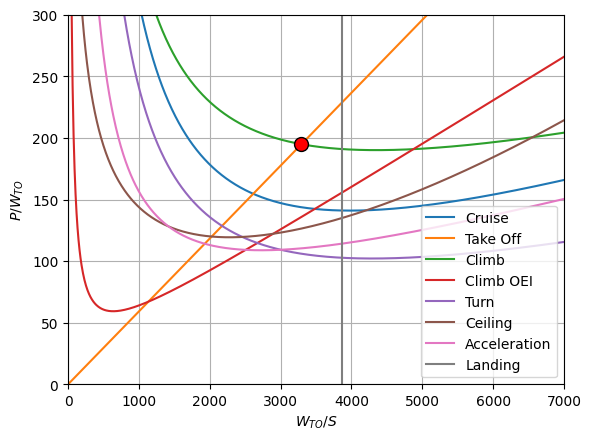

In [16]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$P/W_{TO}$')
plt.show()

... or assign a wing loading

In [17]:
# myaircraft.DesignWTOoS = 3323

Run Mission analysis to define the aircraft's masses

In [18]:
myaircraft.weight.WeightEstimation()

Wing surface can be readily estimated as S = WTO/(WTO/S)

In [19]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

if (myaircraft.Configuration == 'Hybrid' and WellToTankInput is not None):
    myaircraft.welltowake.EvaluateSource()

A summary of the preliminary design:

In [20]:
print('Fuel mass (trip + altn) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
if myaircraft.Configuration == 'Hybrid':
    print('Battery mass [Kg]:            ', myaircraft.weight.WBat)
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat + myaircraft.weight.WPayload)
else:
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WPayload)

print('----------------------------------------')
print('Takeoff Weight: ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None and myaircraft.Configuration == 'Hybrid':
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface: ', myaircraft.WingSurface, ' m^2')
print('TakeOff engine shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise engine shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('TakeOff battery peak power [kW]:           ', myaircraft.mission.TO_PBat/1000.)
print('Climb/cruise battery peak power [kW]:      ', myaircraft.mission.Max_PBat/1000.)
if myaircraft.Configuration == 'Hybrid':
    if myaircraft.battery.BatteryClass == 'II':
        print('-------------Battery Specs-------------')
        print('Battery Pack Energy [kWh]:           ', myaircraft.battery.pack_energy/1000)
        print('Battery Pack Max Power [kW]:         ', myaircraft.battery.pack_power_max/1000)
        print('Battery Pack Specific Energy [Wh/kg]:',(myaircraft.battery.pack_energy)/myaircraft.weight.WBat)
        print('Battery Pack Specific Power [kW/kg]: ',(myaircraft.battery.pack_power_max/1000)/myaircraft.weight.WBat)
        print('Battery Configuration: ', f"S{myaircraft.battery.S_number} P{myaircraft.battery.P_number}" )

print('-------------Sizing Phase--------------')
#print('Sizing phase for battery: ', 'Cruise energy' if myaircraft.battery.energy_or_power == 'energy' else 'Cruise peak power' if myaircraft.weight.TOPwr_or_CruisePwr == 'cruise' else 'Takeoff peak power'  ) #uncomment when i add a mechanism for seeing which constraint drove what thing in the battery sizing
print('Sizing phase for thermal powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )
# print('Sizing phase for electric powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PBat > myaircraft.mission.TO_PBat else 'Takeoff peak power'  )

Fuel mass (trip + altn) [Kg]:  1600.5147199740836
Block Fuel mass [Kg]:          1730.5147199740836
Battery mass [Kg]:             2689.7055059460986
Structure [Kg]:                10483.977190959864
Powertrain mass [Kg]:          1528.5245253885632
Empty Weight [Kg]:             15202.207222294524
Zero Fuel Weight [Kg]:         19762.207222294524
----------------------------------------
Takeoff Weight:  21492.745479355068
Source Energy:  288682.12950854946  MJ
Psi:  0.03530723654564507
Wing Surface:  64.01189271370068  m^2
TakeOff engine shaft peak power [kW]:       5391.919383466223
Climb/cruise engine shaft peak power [kW]:  4646.600861414283
TakeOff battery peak power [kW]:            0.0
Climb/cruise battery peak power [kW]:       1124.0544217252905
-------------Sizing Phase--------------
Sizing phase for thermal powertrain  Takeoff peak power


Some plots:

In [21]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    # Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])

print(len(beta))

201


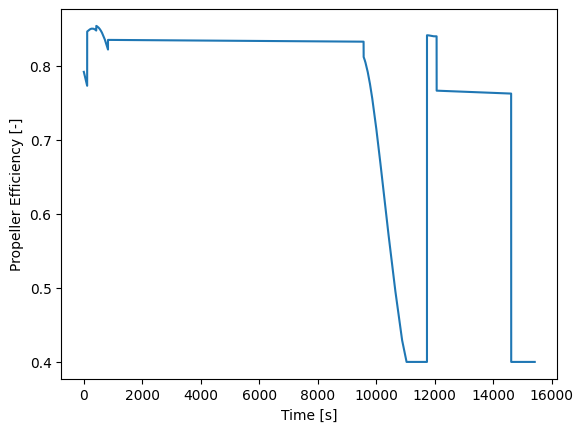

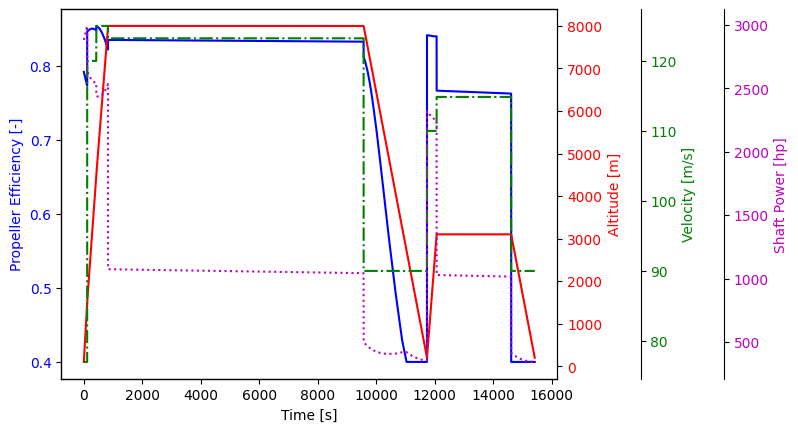

In [22]:
# HAMILTON PROPELLER MODEL


Alt = mission.profile.Altitude(times)
Velocity = mission.profile.Velocity(times) 
PP = [(myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))]
Phi = [mission.profile.SuppliedPowerRatio(t) for t in times]
PRatio = [powertrain.Hybrid(Phi[t],Alt[t],Velocity[t],PP[t]) for t in range(len(times))]


ShaftPower = [Units.wTohp(PP[t]/2)*PRatio[t][3] for t in range(len(times))]

PropEff = [powertrain.Propeller.ComputePropEfficiency(Alt[t],Velocity[t],PP[t]*PRatio[t][3]) for t in range(len(times))]

PropEff = np.array(PropEff)

PropEff[(PropEff > 1.0) | (PropEff < 0.4)] = 0.4

plt.plot(times, PropEff)
plt.xlabel('Time [s]')
plt.ylabel('Propeller Efficiency [-]')



# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot first variable
ax1.plot(times, PropEff, 'b-')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Propeller Efficiency [-]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(times, mission.profile.Altitude(times), 'r')
ax2.set_ylabel("Altitude [m]", color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Offset the third axis
ax3.plot(times, Velocity, 'g-.')
ax3.set_ylabel("Velocity [m/s]", color='g')
ax3.tick_params(axis='y', labelcolor='g')

ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 120))  # Offset fourth axis further
ax4.plot(times, ShaftPower, 'm:', label="cos(x)")
ax4.set_ylabel("Shaft Power [hp]", color='m')
ax4.tick_params(axis='y', labelcolor='m')

In [23]:
myaircraft.MissionType = 'Continue'
myaircraft.climateimpact.calculate_mission_emissions()
print(myaircraft.climateimpact.mission_emissions)

myaircraft.climateimpact.ATR()


{'co2': 6589.51674137906, 'h2o': 2016.6485471673454, 'so4': 0.32010294399481676, 'soot': 0.06402058879896334, 'nox': 21.065681744819543}


0.002955500378804427

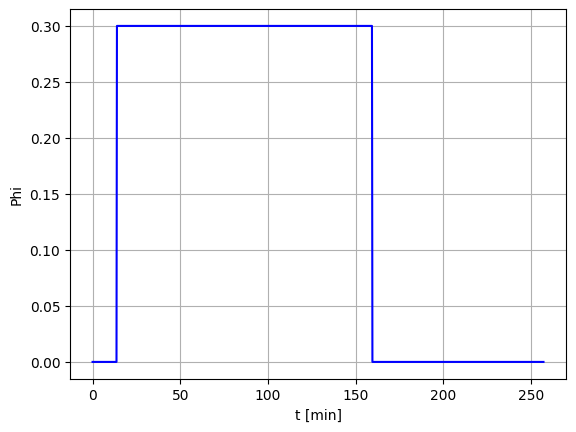

In [24]:
times = np.linspace(0,mission.profile.MissionTime2,num = 1000)
plt.plot(times/60,[mission.profile.SuppliedPowerRatio(t) for t in times], 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Phi')
plt.show()

In [25]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])

Takeoff propulsive power

In [26]:
myaircraft.performance.TakeOff(myaircraft.DesignWTOoS,myaircraft.constraint.TakeOffConstraints['Beta'], myaircraft.constraint.TakeOffConstraints['Altitude'],myaircraft.constraint.TakeOffConstraints['kTO'], myaircraft.constraint.TakeOffConstraints['sTO'], myaircraft.constraint.DISA, myaircraft.constraint.TakeOffConstraints['Speed'], myaircraft.constraint.TakeOffConstraints['Speed Type'])

194.88837279163596

Maximum mission Propusive Power over Takeoff Mass

In [27]:
max([myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))])

160.51886203573488

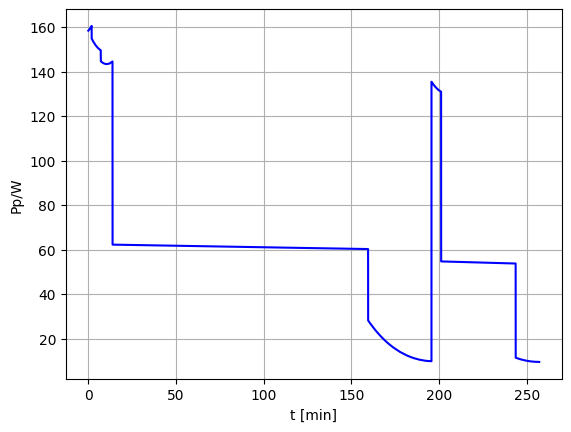

In [28]:
plt.plot(times/60,[myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W')
plt.show()

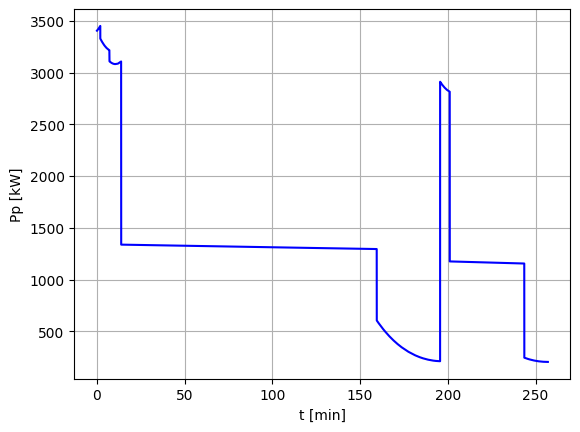

In [29]:
plt.plot(times/60,[(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp [kW]')
plt.show()

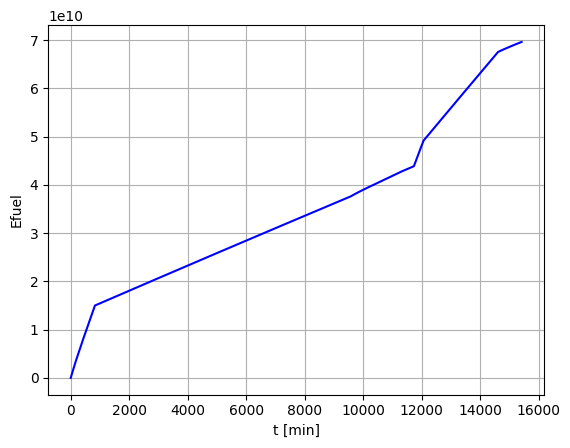

In [30]:
plt.plot(times,Ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Efuel')
plt.show()

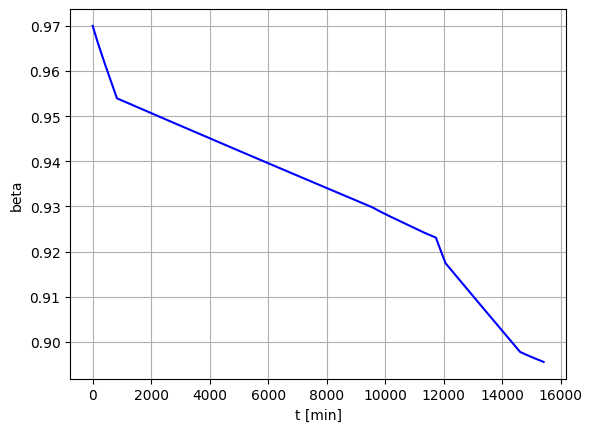

In [31]:
plt.plot(times,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('beta')
plt.show()

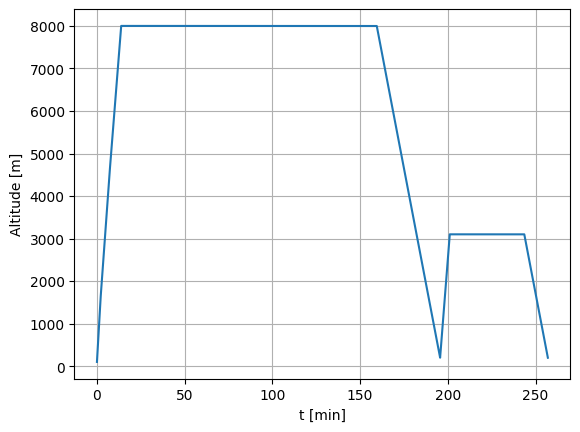

In [32]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()
